In [61]:
# Importing libraries needed
import numpy as np  # for matrices, array, linear algebra
import pandas as pd  # open source data analysis and manipulation

In [62]:
ticket=pd.read_csv("fifa_secondary_ticket_data.csv") 
ticket.head()

,obs,p_F,p_S,q_F,q_S
0,1,1959.14,1674.15,75,76
1,2,1412.54,1246.47,87,79
2,3,2104.71,2210.73,83,59
3,4,2338.27,2090.43,73,68
4,5,1632.88,1350.76,75,75


In [63]:
# Display the shape and column names of our dataset
names = list(ticket) # this gives us a list of column names
print("Our datasets has dimensions", ticket.shape, "with columns", names)

Our datasets has dimensions (47, 5) with columns ['obs', 'p_F', 'p_S', 'q_F', 'q_S']


In [64]:
def LinearReg(x,y):  # Code for regression using the Normal Equation (X.T*X)*theta = (X.T*y)
    theta=np.linalg.solve(X.T @ X, X.T @ y)
    MSE=np.linalg.norm(X @ theta - Y)**2/X.shape[0]
    return theta, MSE

In [65]:
X1=ticket.p_F.values.reshape(-1, 1) # We use two feature variables LIVING_AREA and LOT_SIZE
X2=ticket.p_S.values.reshape(-1, 1)
X = np.column_stack((np.ones_like(X1),X1,X2)) # put a column of ones and X1, X2 together
Y_f=ticket.q_F.values.reshape(-1, 1)

theta, MSE = LinearReg(X,Y_f) # Perform Linear regression

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0], ", theta_2=", theta[2][0])
print("Mean RSS = ", MSE)

Least square solution: theta_0= 103.87295784272284 , theta_1= -0.031623914434526494 , theta_2= 0.01817104262953653
Mean RSS =  16.220983502744225


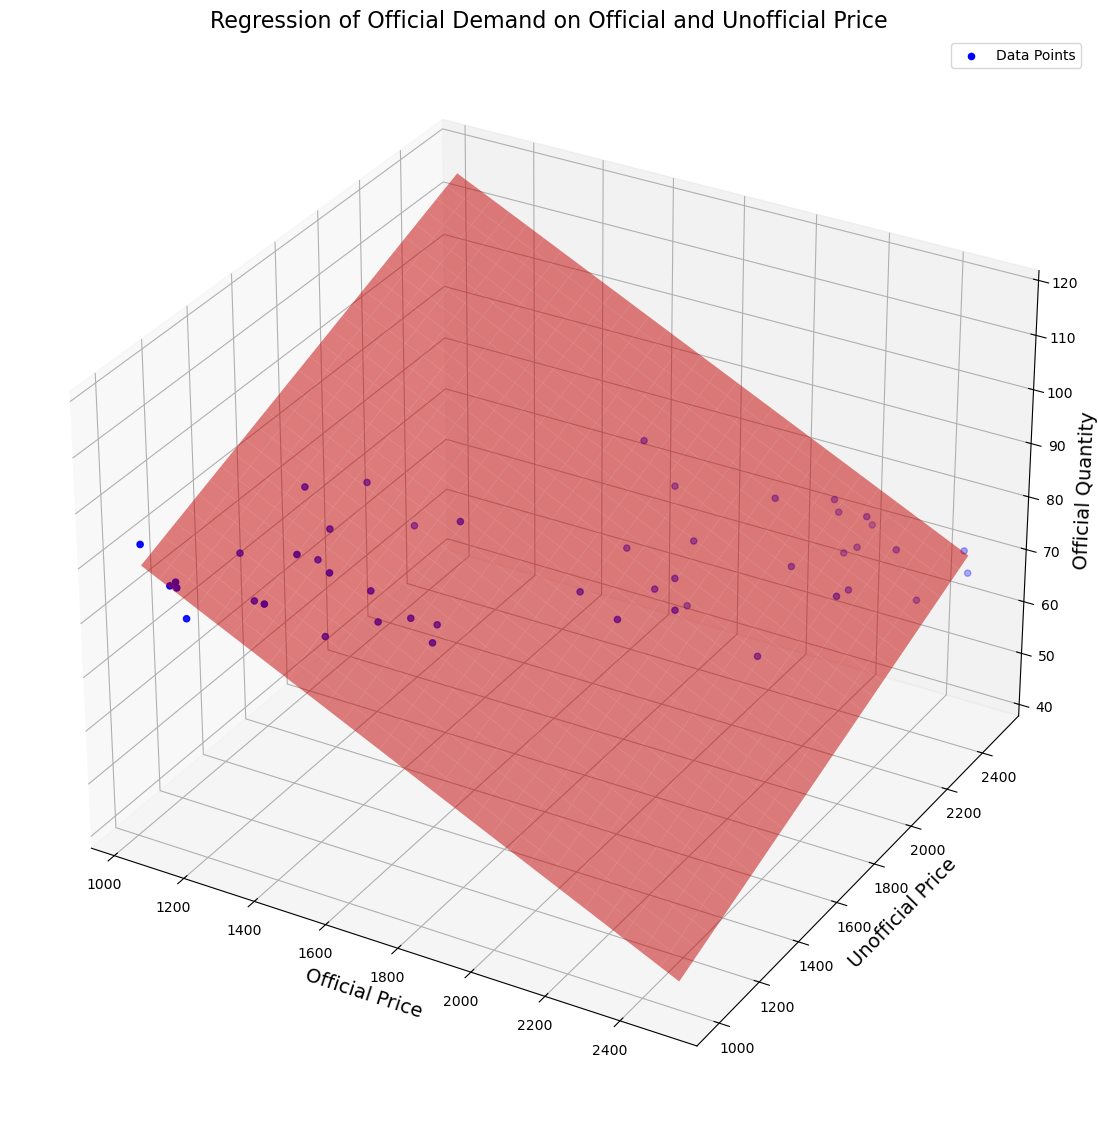

In [66]:
# Generate a grid for the 3D plot
x1_range = np.linspace(X1.min(), X1.max(), 30)
x2_range = np.linspace(X2.min(), X2.max(), 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_plot = np.column_stack((np.ones(x1_grid.size), x1_grid.flatten(), x2_grid.flatten()))

# Calculate predicted prices for the grid
y_pred = X_plot @ theta
y_pred_grid = y_pred.reshape(x1_grid.shape)

# Plot data points and regression surface
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y_f, color='blue', label='Data Points')
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.5, color='red')

# Label axes
ax.set_xlabel('Official Price', fontsize=14)
ax.set_ylabel('Unofficial Price', fontsize=14)
ax.set_zlabel('Official Quantity', fontsize=14)
ax.set_title('Regression of Official Demand on Official and Unofficial Price', fontsize=16)

plt.legend()
plt.show()

In [67]:
X1=ticket.p_F.values.reshape(-1, 1) # We use two feature variables LIVING_AREA and LOT_SIZE
X2=ticket.p_S.values.reshape(-1, 1)
X = np.column_stack((np.ones_like(X2),X2,X1)) # put a column of ones and X1, X2 together
Y_s=ticket.q_S.values.reshape(-1, 1)

theta, MSE = LinearReg(X,Y_s) # Perform Linear regression

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0], ", theta_2=", theta[2][0])
print("Mean RSS = ", MSE)

Least square solution: theta_0= 97.7626067989921 , theta_1= -0.03218725381679659 , theta_2= 0.016154780900372468
Mean RSS =  157.99095777434488


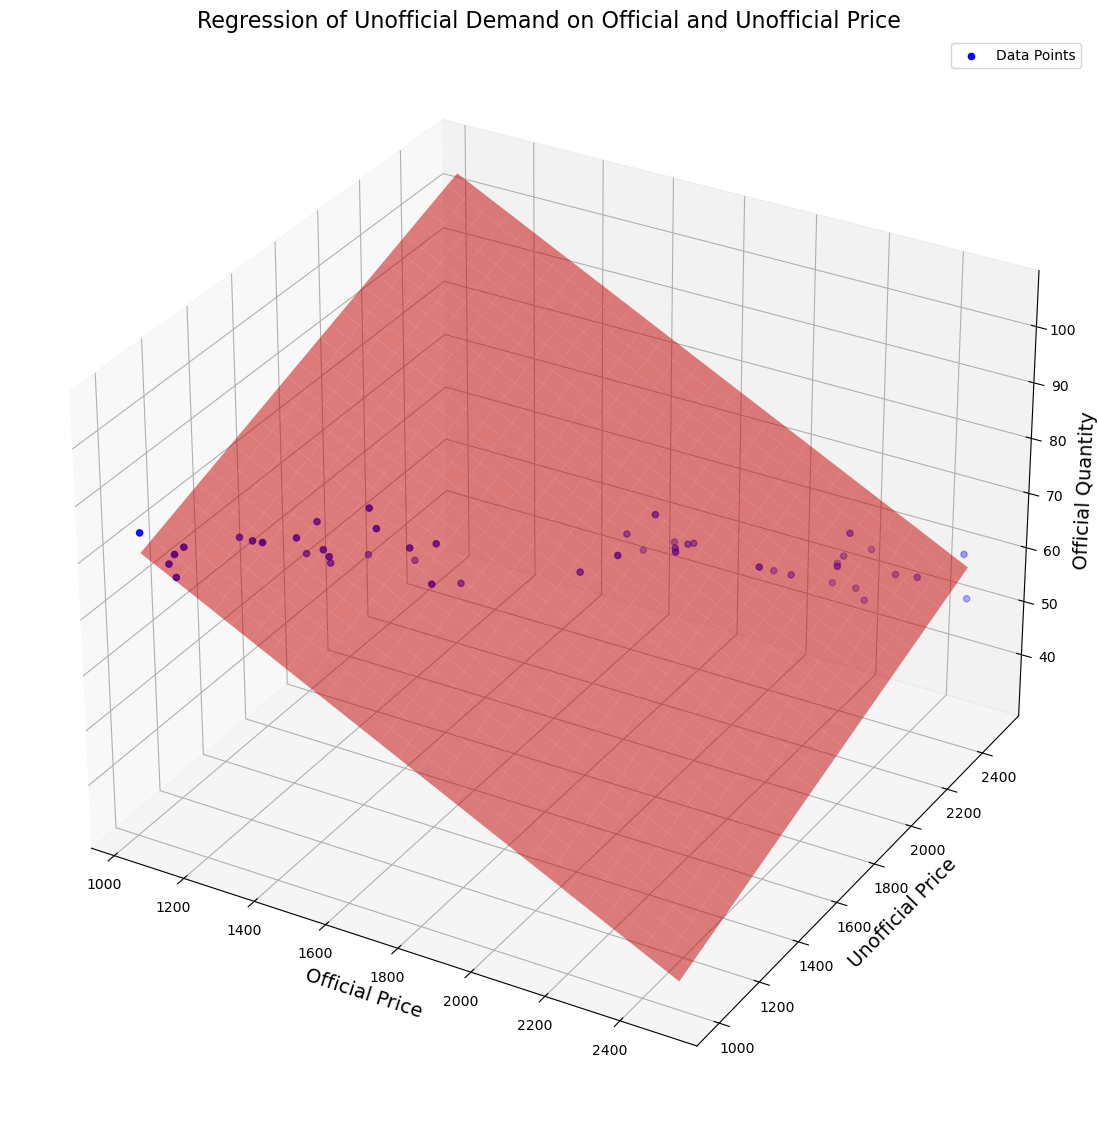

In [68]:
# Generate a grid for the 3D plot
x1_range = np.linspace(X1.min(), X1.max(), 30)
x2_range = np.linspace(X2.min(), X2.max(), 30)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_plot = np.column_stack((np.ones(x1_grid.size), x1_grid.flatten(), x2_grid.flatten()))

# Calculate predicted prices for the grid
y_pred = X_plot @ theta
y_pred_grid = y_pred.reshape(x1_grid.shape)

# Plot data points and regression surface
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y_s, color='blue', label='Data Points')
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.5, color='red')

# Label axes
ax.set_xlabel('Official Price', fontsize=14)
ax.set_ylabel('Unofficial Price', fontsize=14)
ax.set_zlabel('Official Quantity', fontsize=14)
ax.set_title('Regression of Unofficial Demand on Official and Unofficial Price', fontsize=16)

plt.legend()
plt.show()

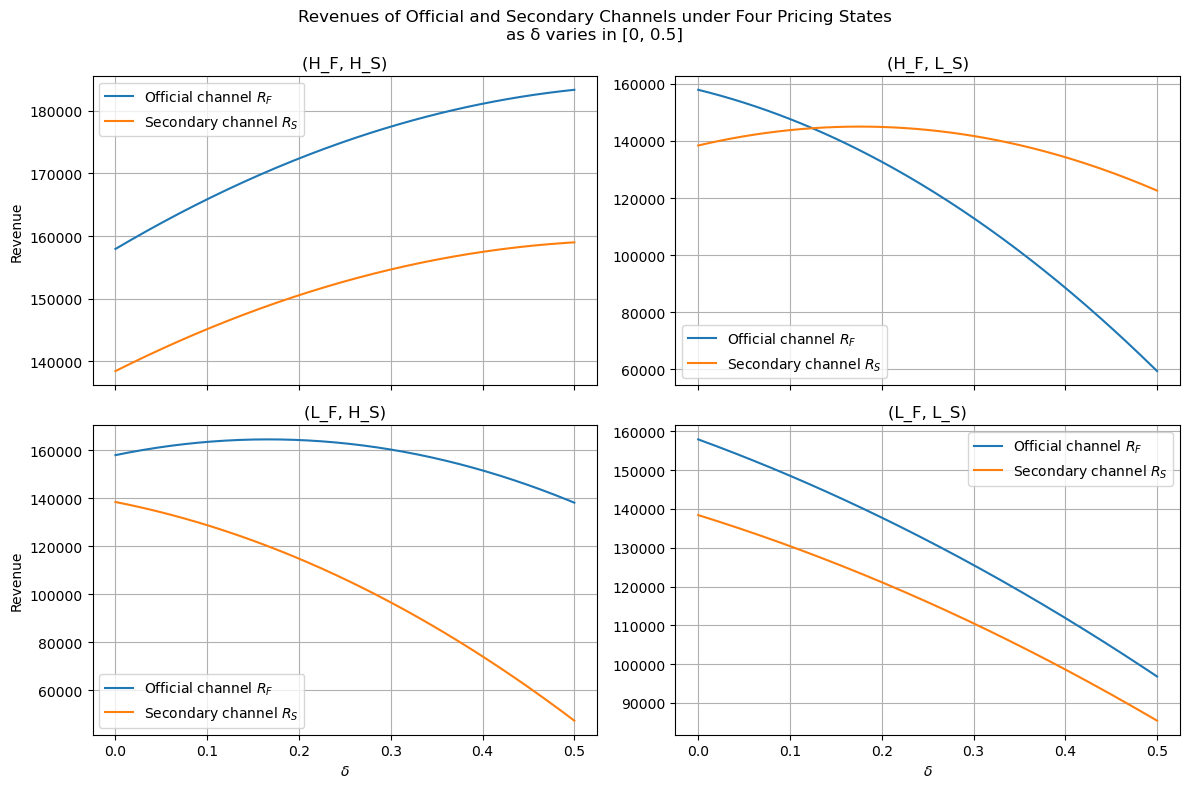

In [80]:
# ================================
# 1. Parameter Settings
# ================================
# Static Bertrand Nash Equilibrium Price
pF_star = 2207.8   # official channel equilibrium price p_F^*
pS_star = 2079.5   # secondary channel equilibrium price p_S^*

# 线性需求系统：式 (5) 和 (6)
def q_F(pF, pS):
    """
    Official channel quantity q_F(p_F, p_S)
    """
    q = 103.87 - 0.0316 * pF + 0.0180 * pS
    return np.maximum(q, 0.0)  

def q_S(pF, pS):
    """
    Secondary channel quantity q_S(p_F, p_S)
    """
    q = 97.76 - 0.0322 * pS + 0.0162 * pF
    return np.maximum(q, 0.0)

def revenue(pF, pS):
    """
    R_F = p_F * q_F, R_S = p_S * q_S
    """
    qF = q_F(pF, pS)
    qS = q_S(pF, pS)
    RF = pF * qF
    RS = pS * qS
    return RF, RS

# ================================
# 2. Set the δ grid
# ================================
delta_grid = np.linspace(0.0, 0.5, 201)  # δ ∈ [0, 0.5]

# Create arrays in advance for the four price states.
RF_HH, RS_HH = [], []
RF_HL, RS_HL = [], []
RF_LH, RS_LH = [], []
RF_LL, RS_LL = [], []

# ================================
# 3. Calculate the revenue for each of the four price states for each δ.
# ================================
for delta in delta_grid:
    # 高价 / 低价（对应式 (13), (14)）
    HF = (1.0 + delta) * pF_star
    LF = (1.0 - delta) * pF_star
    HS = (1.0 + delta) * pS_star
    LS = (1.0 - delta) * pS_star

    # 1) (H_F, H_S)
    RF, RS = revenue(HF, HS)
    RF_HH.append(RF)
    RS_HH.append(RS)

    # 2) (H_F, L_S)
    RF, RS = revenue(HF, LS)
    RF_HL.append(RF)
    RS_HL.append(RS)

    # 3) (L_F, H_S)
    RF, RS = revenue(LF, HS)
    RF_LH.append(RF)
    RS_LH.append(RS)

    # 4) (L_F, L_S)
    RF, RS = revenue(LF, LS)
    RF_LL.append(RF)
    RS_LL.append(RS)


RF_HH, RS_HH = np.array(RF_HH), np.array(RS_HH)
RF_HL, RS_HL = np.array(RF_HL), np.array(RS_HL)
RF_LH, RS_LH = np.array(RF_LH), np.array(RS_LH)
RF_LL, RS_LL = np.array(RF_LL), np.array(RS_LL)

# ================================
# 4. Draw four line graphs (2x2 subplots).
# ================================
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# (H_F, H_S)
ax = axes[0, 0]
ax.plot(delta_grid, RF_HH, label="Official channel $R_F$")
ax.plot(delta_grid, RS_HH, label="Secondary channel $R_S$")
ax.set_title("(H_F, H_S)")
ax.set_ylabel("Revenue")
ax.grid(True)
ax.legend()

# (H_F, L_S)
ax = axes[0, 1]
ax.plot(delta_grid, RF_HL, label="Official channel $R_F$")
ax.plot(delta_grid, RS_HL, label="Secondary channel $R_S$")
ax.set_title("(H_F, L_S)")
ax.grid(True)
ax.legend()

# (L_F, H_S)
ax = axes[1, 0]
ax.plot(delta_grid, RF_LH, label="Official channel $R_F$")
ax.plot(delta_grid, RS_LH, label="Secondary channel $R_S$")
ax.set_title("(L_F, H_S)")
ax.set_xlabel(r"$\delta$")
ax.set_ylabel("Revenue")
ax.grid(True)
ax.legend()

# (L_F, L_S)
ax = axes[1, 1]
ax.plot(delta_grid, RF_LL, label="Official channel $R_F$")
ax.plot(delta_grid, RS_LL, label="Secondary channel $R_S$")
ax.set_title("(L_F, L_S)")
ax.set_xlabel(r"$\delta$")
ax.grid(True)
ax.legend()

fig.suptitle("Revenues of Official and Secondary Channels under Four Pricing States\nas δ varies in [0, 0.5]", y=0.98)

plt.tight_layout()
plt.show()
